# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
(summary_ob_f07, context_ob_f07, model_ob_f07, metric_ob_f07) = pickle.load(open( '19-02-01_results_over_baseline_faces_07.p', "rb"))
(summary_ob_f05, context_ob_f05, model_ob_f05, metric_ob_f05) = pickle.load(open( '19-02-01_results_over_baseline_faces_05.p', "rb"))
(summary_ob_f03, context_ob_f03, model_ob_f03, metric_ob_f03) = pickle.load(open( '19-02-01_results_over_baseline_faces_03.p', "rb"))

## Get the IG scores

In [8]:
ig_table = summary[:,:,2]
ig_f03_table = summary_f03[:,:,2]
ig_f05_table = summary_f05[:,:,2]
ig_f07_table = summary_f07[:,:,2]

In [9]:
ig_ob_f03_table = summary_ob_f03[0][:,:,2]
ig_ob_f05_table = summary_ob_f05[0][:,:,2]
ig_ob_f07_table = summary_ob_f07[0][:,:,2]

## Change scores into DataFrames

In [10]:
IG = pd.DataFrame(data=ig_table, columns=model, index=context)
IG.columns.name='models'
IG.index.name='context'

IG = IG.transpose()
IG

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.601486,3.507835,3.753299,3.815986,4.324051,2.754290
cas,4.042589,3.957036,4.181276,4.193363,4.651863,3.887734
covsal,2.988373,2.990500,2.984926,2.751369,3.440113,2.878326
gbvs,4.389129,4.261897,4.595379,4.601708,4.949470,4.191043
icf,3.967415,3.761353,4.301451,4.290669,4.631382,3.111732
ik,3.782932,3.630731,4.029657,3.795496,4.468836,3.324104
sun,3.689604,3.501879,3.993918,3.997621,4.343237,3.224621
dg,3.110164,2.745240,3.701723,2.988734,3.812890,1.685864
faces,-17.790197,-17.857992,-11.146258,-19.223443,-15.835044,-21.367014


In [11]:
faces = IG.loc['faces']
IG = IG.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg']]

In [12]:
IG_f03 = pd.DataFrame(data=ig_f03_table, columns=model_f03, index=context_f03)
IG_f03.columns.name='models'
IG_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
IG_f03 = IG_f03.rename(index=str, columns=col).transpose()

IG_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.618003,3.527088,3.765382,3.845403,4.344158,2.759067
cas,4.058921,3.978041,4.190726,4.199506,4.688515,3.894333
covsal,3.040721,3.051236,3.023675,2.820840,3.496465,2.887945
gbvs,4.401902,4.283458,4.593905,4.607203,4.971440,4.194267
icf,3.973449,3.769190,4.304565,4.300628,4.643860,3.101522
ik,3.803815,3.665109,4.028663,3.802530,4.499704,3.337869
sun,3.722750,3.554025,3.996262,4.011587,4.393395,3.250412


In [13]:
IG_f05 = pd.DataFrame(data=ig_f05_table, columns=model_f05, index=context_f05)
IG_f05.columns.name='models'
IG_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
IG_f05 = IG_f05.rename(index=str, columns=col).transpose()

IG_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.621147,3.531901,3.765820,3.851181,4.335948,2.762576
cas,4.065310,3.994718,4.179743,4.205287,4.679961,3.898440
covsal,2.953291,2.923755,3.001170,2.827348,3.325123,2.819411
gbvs,4.409638,4.295767,4.594228,4.612659,4.982618,4.198131
icf,3.969019,3.761984,4.304633,4.305627,4.641397,3.072100
ik,3.797096,3.654073,4.028943,3.808641,4.484631,3.307266
sun,3.736457,3.575580,3.997246,4.019056,4.415944,3.259311


In [14]:
IG_f07 = pd.DataFrame(data=ig_f07_table, columns=model_f07, index=context_f07)
IG_f07.columns.name='models'
IG_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
IG_f07 = IG_f07.rename(index=str, columns=col).transpose()

IG_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,3.587259,3.487799,3.748489,3.852371,4.218584,2.741446
cas,4.066109,3.996429,4.179063,4.210123,4.667054,3.894861
covsal,2.789149,2.667026,2.987118,2.812137,3.027352,2.669817
gbvs,4.407047,4.291430,4.594469,4.618031,4.974742,4.180200
icf,3.923243,3.688618,4.303583,4.307592,4.564235,2.977367
ik,3.771581,3.613663,4.027574,3.812851,4.471487,3.238392
sun,3.737136,3.576466,3.997592,4.024575,4.417883,3.259335


In [15]:
IG_ob_f03 = pd.DataFrame(data=ig_ob_f03_table, columns=model_ob_f03, index=context_ob_f03)
IG_ob_f03.columns.name='models'
IG_ob_f03.index.name='context'

IG_ob_f03 = IG_ob_f03.transpose()
IG_ob_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim_face_03,0.016517,0.019253,0.012083,0.029417,0.020108,0.004777
cas_face_03,0.012309,0.021005,-0.001862,0.006143,0.012940,0.006599
covsal_face_03,0.052348,0.060736,0.038749,0.069471,0.056351,0.009619
gbvs_face_03,0.012773,0.021562,-0.001474,0.005496,0.021970,0.003224
icf_face_03,0.006035,0.007837,0.003114,0.009959,0.012478,-0.010210
ik_face_03,0.020883,0.034379,-0.000994,0.007034,0.030868,0.013765
sun_face_03,0.033146,0.052146,0.002344,0.013966,0.050158,0.025791


In [16]:
IG_ob_f05 = pd.DataFrame(data=ig_ob_f05_table, columns=model_ob_f05, index=context_ob_f05)
IG_ob_f05.columns.name='models'
IG_ob_f05.index.name='context'

IG_ob_f05 = IG_ob_f05.transpose()
IG_ob_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim_face_05,0.019661,0.024066,0.012521,0.035195,0.011898,0.008286
cas_face_05,0.022721,0.037683,-0.001533,0.011924,0.028098,0.010706
covsal_face_05,-0.035082,-0.066744,0.016245,0.075979,-0.114990,-0.058916
gbvs_face_05,0.020508,0.033870,-0.001151,0.010951,0.033148,0.007088
icf_face_05,0.001604,0.000630,0.003182,0.014958,0.010015,-0.039632
ik_face_05,0.014164,0.023342,-0.000714,0.013145,0.015795,-0.016838
sun_face_05,0.046852,0.073701,0.003329,0.021435,0.072707,0.034690


In [17]:
IG_ob_f07 = pd.DataFrame(data=ig_ob_f07_table, columns=model_ob_f07, index=context_ob_f07)
IG_ob_f07.columns.name='models'
IG_ob_f07.index.name='context'

IG_ob_f07 = IG_ob_f07.transpose()
IG_ob_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim_face_07,-0.014227,-0.020037,-0.004810,0.036385,-0.105467,-0.012844
cas_face_07,0.023519,0.039394,-0.002214,0.016760,0.015191,0.007127
covsal_face_07,-0.199223,-0.323473,0.002192,0.060768,-0.412761,-0.208509
gbvs_face_07,0.017918,0.029533,-0.000910,0.016323,0.025272,-0.010842
icf_face_07,-0.044171,-0.072735,0.002132,0.016923,-0.067147,-0.134364
ik_face_07,-0.011351,-0.017068,-0.002083,0.017356,0.002651,-0.085712
sun_face_07,0.047532,0.074587,0.003674,0.026954,0.074646,0.034714


## Vizualization

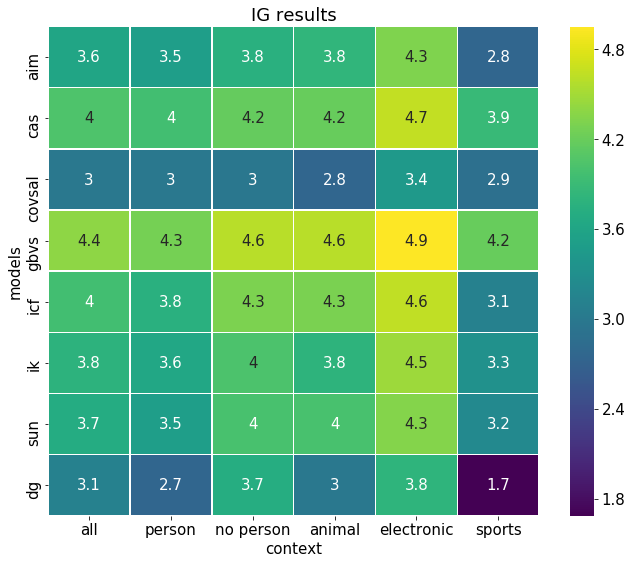

In [18]:
matplotlib.rcParams.update({'font.size': 15})
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('IG results');
plt.savefig('plots/IG_all.jpg', bbox_inches='tight', pad_inches=0)

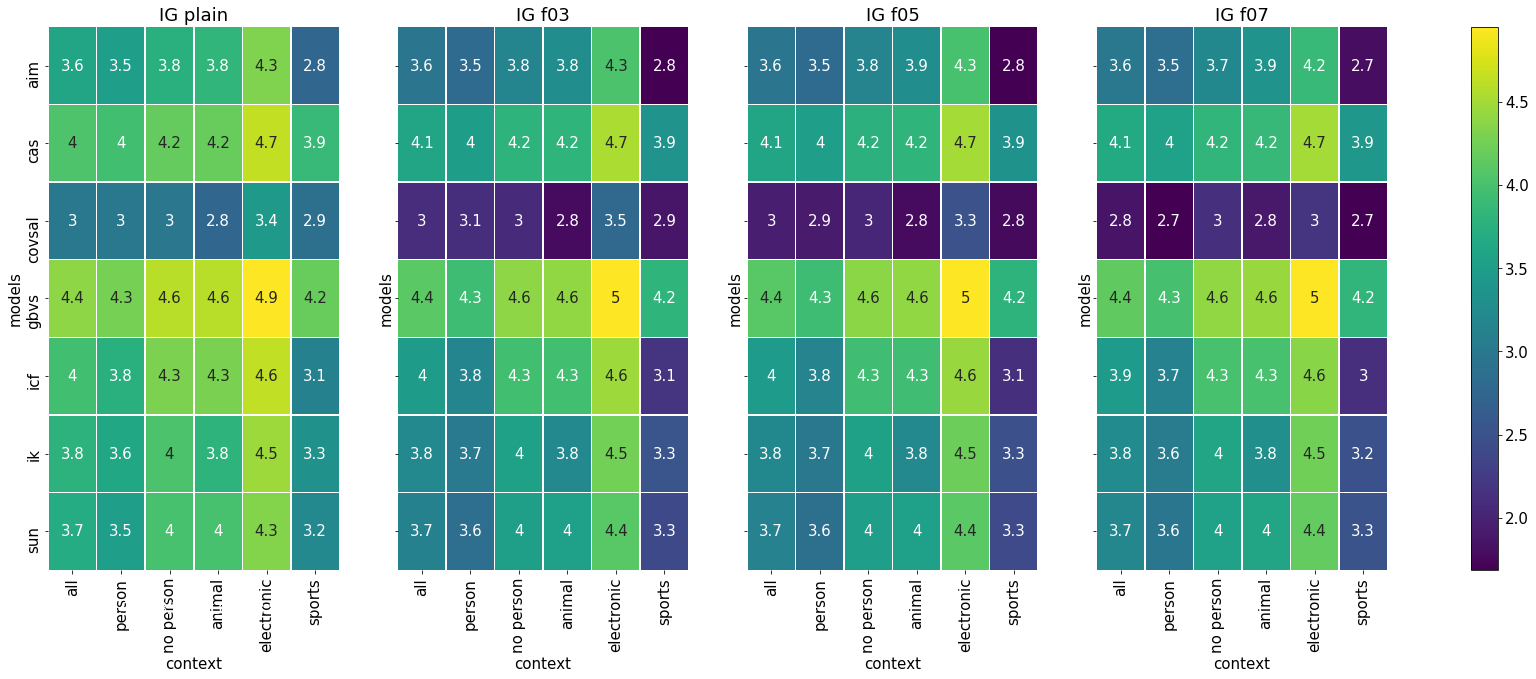

In [19]:
fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

im = sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(IG_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(IG_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(IG_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('IG plain');
ax[1].set_title('IG f03');
ax[2].set_title('IG f05');
ax[3].set_title('IG f07');
# plt.savefig('plots/IG_sep.jpg', bbox_inches='tight', pad_inches=0)

### Calculate the relative error

In [20]:
IG0 = IG.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

In [21]:
IG_diff_f03 = ((IG_f03 - IG0) / IG0)*100
IG_diff_f05 = ((IG_f05 - IG0) / IG0)*100
IG_diff_f07 = ((IG_f07 - IG0) / IG0)*100

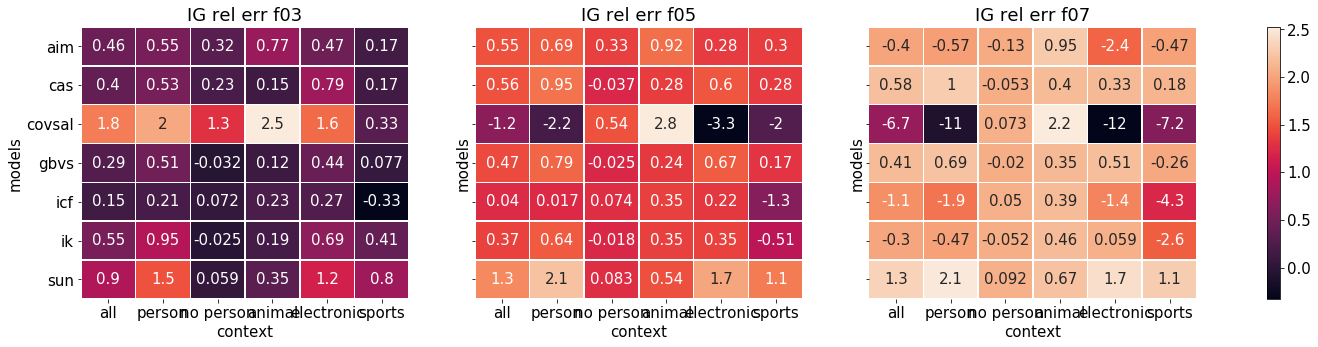

In [22]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(IG_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(IG_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(IG_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('IG rel err f03');
ax[1].set_title('IG rel err f05');
ax[2].set_title('IG rel err f07');
# plt.savefig('plots/ig_rel_err.jpg', bbox_inches='tight', pad_inches=0)

### IG vs baseline of faces

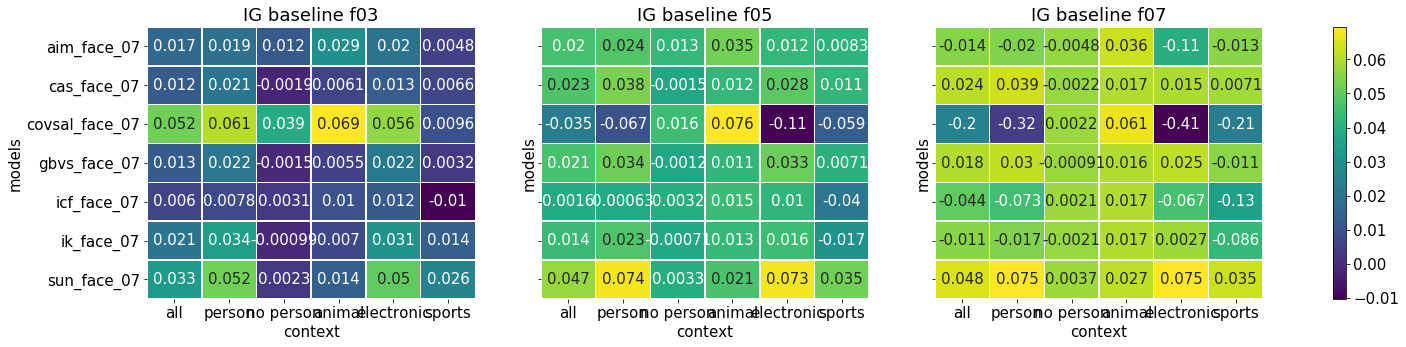

In [23]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(IG_ob_f03, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(IG_ob_f05, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(IG_ob_f07, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('IG baseline f03');
ax[1].set_title('IG baseline f05');
ax[2].set_title('IG baseline f07');
# plt.savefig('plots/ig_baseline.jpg', bbox_inches='tight', pad_inches=0)

In [24]:
dg = IG.loc['dg']
dg

context
all           3.110164
person        2.745240
no person     3.701723
animal        2.988734
electronic    3.812890
sports        1.685864
Name: dg, dtype: float64

In [25]:
gbvs_f07 = IG_f07.transpose()['gbvs']
gbvs = IG.transpose()['gbvs']

In [26]:
df_comp = pd.DataFrame([gbvs, gbvs_f07,dg], index=['gbvs', 'gbvs_f07', 'dg'])
df_comp = df_comp.transpose()

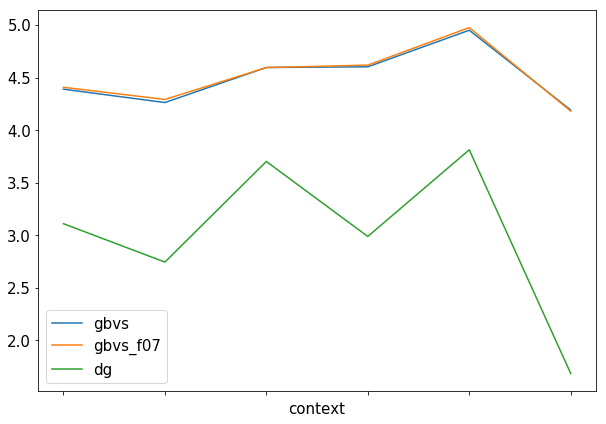

In [27]:
fig, ax = plt.subplots(figsize=(10, 7));
df_comp.plot(ax=ax);

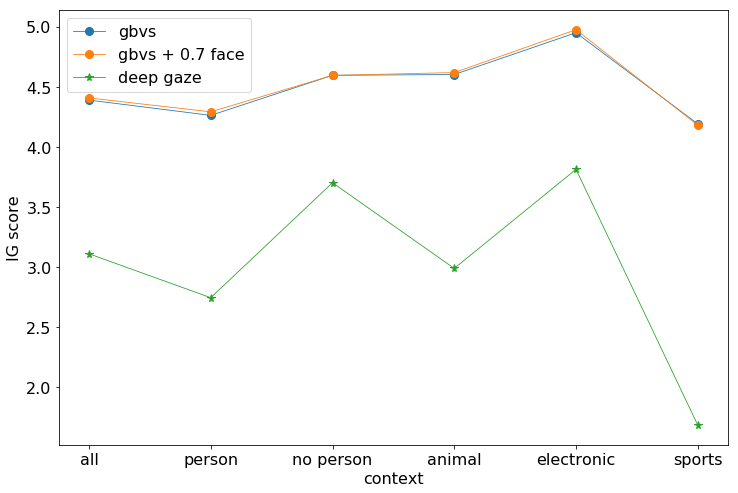

In [33]:
t = np.arange(0,6)
d = 0.8
m = 8

matplotlib.rcParams.update({'font.size': 16})

plt.subplots(figsize=(12,8))
plt.plot(gbvs, '-o', label='gbvs', linewidth=d, markersize=m);
plt.plot(gbvs_f07, '-o', label='gbvs + 0.7 face', linewidth=d, markersize=m);
plt.plot(dg, '-*', label='deep gaze', linewidth=d, markersize=m)

plt.ylabel('IG score')
plt.xlabel('context')
# plt.title('Comparison of GBVS and DeepGaze performance for different contexts')
plt.legend();

plt.savefig('plots/IG_gbvs_performance.jpg', bbox_inches='tight', pad_inches=0)